# 过拟合与欠拟合 与 决策树剪枝

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ML.decision_tree import DecisionTreeClassifier

### 过拟合与欠拟合

In [2]:
X = np.loadtxt('x.txt')
X = X[:, :2]
y = np.loadtxt('y.txt')

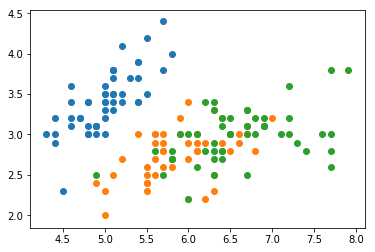

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [4]:
from ML.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, seed=100)

In [5]:
dt_clf = DecisionTreeClassifier(max_depth=999999999)
dt_clf.fit(X, y)

d=0, v=4.85, g=0.6571619514368456, l=None

In [6]:
dt_clf.accuracy_rate(x_train, y_train)

0.8938053097345132

In [7]:
dt_clf.accuracy_rate(x_test, y_test)

0.8648648648648649

In [8]:
def plot_decision_boundary(X, y, predict_fun, step=0.1):
    x_min = X[:, 0].min() - 0.5
    x_max = X[:, 0].max() + 0.5
    y_min = X[:, 1].min() - 0.5
    y_max = X[:, 1].max() + 0.5
    
    x_mesh, y_mesh = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))      # 画网格
    labels = predict_fun(np.concatenate([x_mesh.reshape(-1, 1), y_mesh.reshape(-1, 1)], axis = 1))        # 获取预测值
    z = labels.reshape(x_mesh.shape)         # 将预测值转为与x_mesh相同的维度
    
    plt.contourf(x_mesh, y_mesh, z, cmap = plt.cm.Spectral)         # 画梯度图
    
    plt.scatter(X[:, 0], X[:, 1], c=y)                # 绘制散点图
    plt.show()

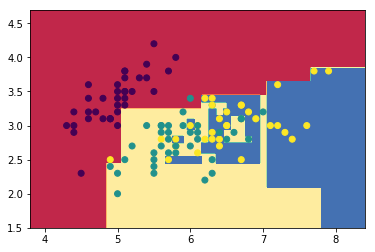

In [9]:
plot_decision_boundary(x_train, y_train, lambda x: dt_clf.predict(x), step=0.01)

In [10]:
dt_clf.show_tree()

### 决策树剪枝

1、设置最大深度<br>
2、设置最小叶片数

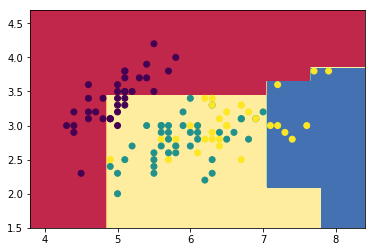

In [11]:
dt_clf = DecisionTreeClassifier(max_depth=10)
dt_clf.fit(X, y)
plot_decision_boundary(x_train, y_train, lambda x: dt_clf.predict(x), step=0.01)

In [12]:
dt_clf.accuracy_rate(x_train, y_train)

0.672566371681416

In [13]:
dt_clf.accuracy_rate(x_test, y_test)

0.5945945945945946

### 以上是  欠拟合

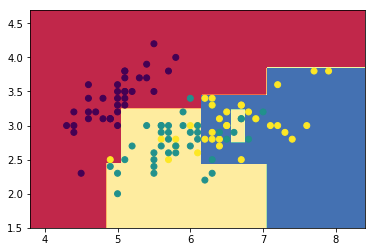

In [14]:
dt_clf = DecisionTreeClassifier(max_depth=999999999, min_samples_leaf=5)
dt_clf.fit(X, y)
plot_decision_boundary(x_train, y_train, lambda x: dt_clf.predict(x), step=0.01)

In [15]:
dt_clf.accuracy_rate(x_train, y_train)

0.8407079646017699

In [16]:
dt_clf.accuracy_rate(x_test, y_test)

0.8648648648648649

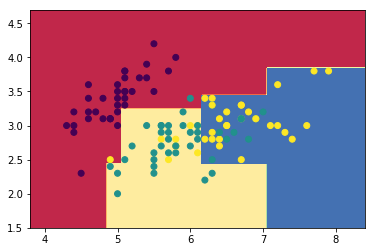

In [17]:
dt_clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=3)
dt_clf.fit(X, y)
plot_decision_boundary(x_train, y_train, lambda x: dt_clf.predict(x), step=0.01)

In [18]:
dt_clf.accuracy_rate(x_train, y_train)

0.8230088495575221

In [19]:
dt_clf.accuracy_rate(x_test, y_test)

0.8378378378378378

In [26]:
%%time
train_accuracy = 0
test_accuracy = 0
for i in range(1, 100):
    for j in range(1, 10):
        dt_clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=3)
        dt_clf.fit(X, y)
        train_acc = dt_clf.accuracy_rate(x_train, y_train)
        test_acc = dt_clf.accuracy_rate(x_test, y_test)
        if train_acc > train_accuracy and test_acc > test_accuracy:
            train_accuracy = train_acc
            test_accuracy = test_acc
            best_max_depth = i
            best_min_samples_leaf = j
print("best_max_depth={}, best_min_samples_leaf={}, train_accuracy={}, test_accuracy={}".format(best_max_depth, best_min_samples_leaf, train_accuracy, test_accuracy))

best_max_depth=1, best_min_samples_leaf=1, train_accuracy=0.8230088495575221, test_accuracy=0.8378378378378378
CPU times: user 20.4 s, sys: 39.4 ms, total: 20.5 s
Wall time: 20.5 s
